![EBAC](https://github.com/marceloaires7/EBAC-Exercicios/blob/main/Exerc%C3%ADcio_Cientista_de_dados_M%C3%B3dulo36/Projeto%20Semantix/imgs/ebac_logo-data_science.png?raw=true)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from script import *

from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from pycaret.classification import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%reload_ext watermark
%watermark -iv -v -p pycaret

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.25.0

pycaret: 3.3.2

numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.1.4
matplotlib: 3.7.5



![Semantix](https://github.com/marceloaires7/EBAC-Exercicios/blob/main/Exerc%C3%ADcio_Cientista_de_dados_M%C3%B3dulo36/Projeto%20Semantix/imgs/Logo-SEMANTIX.PNG?raw=true)

# Projeto Semantix

O objetivo deste projeto é encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explanar e **justificar** a **relevância** do uso de dados para encontrar a solução.

O tema em que vamos focar neste projeto é futebol, vamos baixar um dataset fornecido pelo [Kaggle](http://www.kaggle.com/) contendo todas as informações de cada partidade de futebol da Premier League do ano de 2023/24.

O objetivo será treinar um modelo de machine learning para prever qual time foi o vencedor ou se foi empate. Para isso iremos utilizar as bibliotecas, como o pandas, para nossa análise exploratória de dados e bibliotecas para a plotagem dos gráficos, como matplotlib e seaborn.

Para a modelagem iremos utilizar o PyCaret para buscar o melhor resultado possível.

 >O link para o dataset que se encontra no Kaggle é este: [LINK](https://www.kaggle.com/datasets/mertbayraktar/english-premier-league-matches-20232024-season)

---

## **1. Dados do Dataset:** 

Os dados representam informações dos jogos da Premier League do ano de 2023/24 e contam com as seguintes colunas: 

| *Coluna*            | *Explicação*                          |
|---------------------|---------------------------------------|
| Date                | Data                                  |
| Time                | Horário                               |
| Comp                | "Premier League"                      |
| Round               | Rodada da partida                     |
| Day                 | Dia da Semana                         |
| Venue               | "Home"                                |
| Result              | Resultado da partida ("W", "L" ou "D")|
| GF                  | Gols Marcados                         |
| GA                  | Gols Sofridos                         |
| Opponent            | Oponente                              |
| xG                  | Gols Marcados esperados               |
| xGA                 | Gols Sofridos esperados               |
| Poss                | Posse de bola                         |
| Attendance          | Público presente                      |
| Captain             | Capitão do Time                       |
| Formation           | Formação do Time                      |
| Referee             | Árbitro                               |
| Sh                  | Total de Chutes                       |
| SoT                 | Total de Chutes a Gol                 |
| Dist                | Distância Média  dos Chutes           |
| FK                  | Chutes de Falta                       |
| PK                  | Penaltis Convertidos                  |
| PKatt               | Penaltis Cobrados                     |
| Season              | "2024"                                |
| Team                | Time Mandante                         |
| Captain_Opponent    | Capitão do Time                       |
| Formation_Opponent  | Formação do Time                      |
| Sh_Opponent         | Total de Chutes                       |
| SoT_Opponent        | Total de Chutes a Gol                 |
| Dist_Opponent       | Distância Média dos Chutes            |
| FK_Opponent         | Chutes de Falta                       |
| PK_Opponent         | Penaltis Convertidos                  |
| PKatt_Opponent      | Penaltis Cobrados                     |


---

## **2. Análise Exploratória de Dados (EDA):** 

Vamos carregar nosso dataset e analisar cada um dos dados.

In [2]:
# Lendo CSV.
df = pd.read_csv('.\input\matches.csv',parse_dates=['Date'])

# Drop nas colunas sem relevância.
df.drop(columns=['Unnamed: 0', 'Notes', 'Match Report', 'Comp'], inplace=True)

# Transformando os times, rodada, dia da semana, jogo casa/fora e 'Result' em códigos numéricos.
df['Team_cod'] = df['Team'].map(Teams)
df['Opponent_cod'] = df['Opponent'].map(Teams_Opponent)
df['Opponent'] = df['Opponent_cod'].map({valor: chave for chave, valor in Teams.items()})
df['Round'] = df['Round'].map(Matchweek)
df['Day'] = df['Day'].map(weekday)
df['Venue'] = df['Venue'].map({'Away': 0, 'Home': 1})
df['Points'] = df['Result'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

# Amostra dos dados.
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,SoT,Dist,FK,PK,PKatt,Season,Team,Team_cod,Opponent_cod,Points
0,2023-08-13,16:30,1,6,0,D,1.0,1.0,Chelsea,1.3,...,1.0,17.8,0.0,0,0,2024,Liverpool,11,7,1
1,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,9.0,16.8,1.0,0,1,2024,Liverpool,11,3,3
2,2023-08-27,16:30,3,6,0,W,2.0,1.0,NewcastleUnited,0.9,...,4.0,17.2,1.0,0,0,2024,Liverpool,11,15,3
3,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,4.0,14.7,0.0,0,0,2024,Liverpool,11,2,3
4,2023-09-16,12:30,5,5,0,W,3.0,1.0,WolverhamptonWanderers,2.5,...,5.0,15.8,0.0,0,0,2024,Liverpool,11,20,3


> Transformação das colunas foram feitas através do .map(), os dicionários utilizados estão no script.py

### **Tabela da Premier League 2023/24:**

In [3]:
# Classificação da Premier League.
tabela = df.groupby('Team')['Points'].sum().sort_values(ascending=False).to_frame()
tabela

,Points
Team,
Liverpool,54
ManchesterCity,52
Arsenal,52
TottenhamHotspur,47
AstonVilla,46
ManchesterUnited,41
NewcastleUnited,36
WestHamUnited,36
BrightonandHoveAlbion,35


In [4]:
# Criando coluna 'Matches' para informar as partidas.
for i in df['Team'].unique():
    for j in df['Opponent'].unique():

        Template = i + ' x ' + j

        df.loc[((df['Team'] == i) & (df["Opponent"] == j)) | ((df['Team'] == j) & (df["Opponent"] == i)), 'Matches'] = Template
        
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Dist,FK,PK,PKatt,Season,Team,Team_cod,Opponent_cod,Points,Matches
0,2023-08-13,16:30,1,6,0,D,1.0,1.0,Chelsea,1.3,...,17.8,0.0,0,0,2024,Liverpool,11,7,1,Chelsea x Liverpool
1,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,16.8,1.0,0,1,2024,Liverpool,11,3,3,Bournemouth x Liverpool
2,2023-08-27,16:30,3,6,0,W,2.0,1.0,NewcastleUnited,0.9,...,17.2,1.0,0,0,2024,Liverpool,11,15,3,NewcastleUnited x Liverpool
3,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,14.7,0.0,0,0,2024,Liverpool,11,2,3,AstonVilla x Liverpool
4,2023-09-16,12:30,5,5,0,W,3.0,1.0,WolverhamptonWanderers,2.5,...,15.8,0.0,0,0,2024,Liverpool,11,20,3,WolverhamptonWanderers x Liverpool


In [5]:
# Separando o jogos dentro e fora de casa, para retirarmos as partidas repetidas.
df_home = df[df['Venue'] == 1].copy().reset_index(drop=True)
df_away = df[df['Venue'] == 0].copy().reset_index(drop=True)

In [6]:
# pd.merge nos dois DataFrame (df_home e df_away)
merged_df = pd.merge(df_home, df_away, on=['Matches', 'Round'], suffixes=['', '_Opponent'])
merged_df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,SoT_Opponent,Dist_Opponent,FK_Opponent,PK_Opponent,PKatt_Opponent,Season_Opponent,Team_Opponent,Team_cod_Opponent,Opponent_cod_Opponent,Points_Opponent
0,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,5.0,19.7,1.0,0,0,2024,Bournemouth,3,11,0
1,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,3.0,12.5,0.0,0,0,2024,AstonVilla,2,11,0
2,2023-09-24,14:00,6,6,1,W,3.0,1.0,WestHamUnited,3.0,...,4.0,13.5,0.0,0,0,2024,WestHamUnited,19,11,0
3,2023-10-21,12:30,9,5,1,W,2.0,0.0,Everton,2.2,...,1.0,35.2,0.0,0,0,2024,Everton,9,11,0
4,2023-10-29,14:00,10,6,1,W,3.0,0.0,NottinghamForest,3.2,...,1.0,15.6,0.0,0,0,2024,NottinghamForest,16,11,0


> O DataSet estava com os jogos repetidos, utilizamos o pd.merge para juntar esses jogos repetidos considerando somente os jogos dentro de casa.

---

### Análise da Variável Resposta (Result)

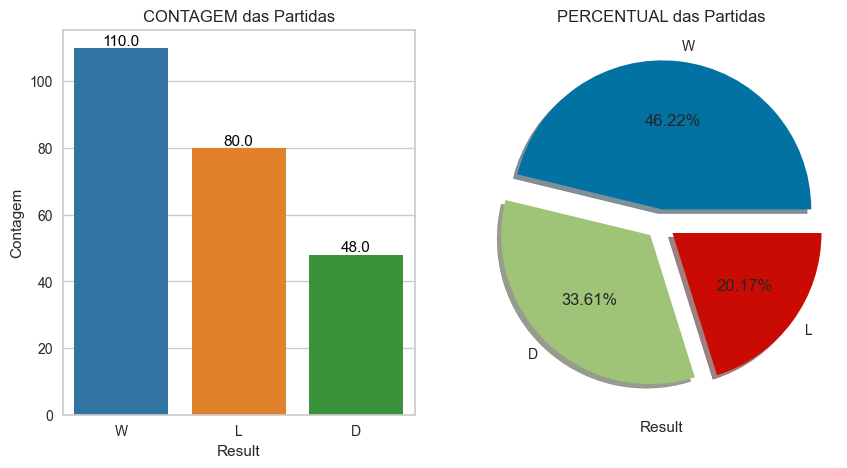

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

ax1 = sns.barplot(merged_df.Result.value_counts(), ax=axes[0], palette='tab10')
ax1.set_title('CONTAGEM das Partidas')
ax1.set_xlabel('Result')
ax1.set_ylabel('Contagem')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

ax2 = plt.pie(merged_df.Result.value_counts(normalize=True), explode=(0.1, 0.1, 0.1), labels=merged_df.Result.unique(), autopct='%1.2f%%', shadow=True)
plt.title('PERCENTUAL das Partidas')
plt.xlabel('Result')
plt.axis('equal')

plt.show()

> Vemos que a quantidade de vitórias dentro de casa é maior, 110 Vitórias contra 48 derrotas.

---

## **3. Preparação dos Dados:** 

Vamos preparar os dados para que o merged_df fique com informações que iremos analisar no modelo.

In [8]:
# Retirando as colunas desnecessárias para a modelagem no Pycaret.
drop_columns = ['Date', 'Time', 'Day',
                'Venue', 'GF', 'GA', 'Opponent',
                'Captain', 'Referee', 'Season',
                'Team', 'Points', 'Matches', 'Date_Opponent', 'Time_Opponent',
                'Day_Opponent', 'Venue_Opponent', 'Result_Opponent', 'GF_Opponent',
                'GA_Opponent', 'Opponent_Opponent', 'xG_Opponent', 'xGA_Opponent',
                'Attendance_Opponent', 'Captain_Opponent', 'Referee_Opponent',
                'Season_Opponent', 'Team_Opponent', 'Team_cod_Opponent', 'Opponent_cod_Opponent', 'Points_Opponent', 'Formation', 'Formation_Opponent']

df_model = merged_df.drop(columns=drop_columns)

# Separando uma parte dos dados para validação.
data = df_model.reset_index(drop=True).sample(frac=.90, random_state=123)
data_unseen = df_model.reset_index(drop=True).drop(index=data.index).reset_index(drop=True)

# Analise do df_model
analise(df_model, 'Result')

,dtype,contagem,missing,nunique,papel
Round,int64,238,0,24,covariavel
Result,object,238,0,3,resposta
xG,float64,238,0,37,covariavel
xGA,float64,238,0,37,covariavel
Poss,float64,238,0,57,covariavel
Attendance,float64,238,0,230,covariavel
Sh,float64,238,0,30,covariavel
SoT,float64,238,0,14,covariavel
Dist,float64,238,0,91,covariavel
FK,float64,238,0,3,covariavel


---

## **4. Modelagem e análise de dados utilizando PyCaret:**

Vamos configurar o Modelo com o Pycaret:
- Iniciando o model com setup()
- Configurar o Modelo com 'create_model' utilizando estimator='lightgbm'
- Tunando o Modelo com 'tune_model' utilizando estimator='lightgbm'
- Modelo Final
- Plotando gráficos gerados pelo PyCaret
- Salvamento com save_model()
- Previsões com predict_model()

In [9]:
# Iniciando o model com setup()

clf = setup(data,
            target='Result',
            session_id=123)

,Description,Value
0,Session id,123
1,Target,Result
2,Target type,Multiclass
3,Target mapping,"D: 0, L: 1, W: 2"
4,Original data shape,"(214, 21)"
5,Transformed data shape,"(214, 21)"
6,Transformed train set shape,"(149, 21)"
7,Transformed test set shape,"(65, 21)"
8,Numeric features,20
9,Preprocess,True


In [10]:
# Configurar o Modelo com 'create_model' utilizando estimator='lightgbm'

lightgbm = create_model(estimator='lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.7004,0.6000,0.6000,0.5933,0.3182,0.3257
1,0.6667,0.6049,0.6667,0.5905,0.6222,0.4048,0.4194
2,0.5333,0.6267,0.5333,0.4917,0.5111,0.2391,0.2410
3,0.7333,0.7689,0.7333,0.7222,0.7224,0.5714,0.5757
4,0.4667,0.5711,0.4667,0.4259,0.4398,0.1176,0.1206
5,0.5333,0.6489,0.5333,0.5667,0.4222,0.1393,0.2696
6,0.5333,0.7044,0.5333,0.4571,0.4889,0.2391,0.2467
7,0.4667,0.6767,0.4667,0.4815,0.4402,0.1781,0.1959
8,0.6667,0.6606,0.6667,0.7300,0.6516,0.4318,0.4603


In [62]:
# Tunando o Modelo com 'tune_model' utilizando estimator='lightgbm'

tuned_lightgbm = tune_model(estimator=lightgbm, optimize='MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7548,0.6667,0.5733,0.6148,0.3750,0.3917
1,0.6667,0.8626,0.6667,0.5733,0.6148,0.3750,0.3917
2,0.6000,0.7139,0.6000,0.4800,0.5294,0.3077,0.3357
3,0.6000,0.7389,0.6000,0.4778,0.5318,0.3182,0.3392
4,0.6000,0.6950,0.6000,0.4800,0.5294,0.3077,0.3357
5,0.6000,0.6956,0.6000,0.4800,0.5294,0.3077,0.3357
6,0.6667,0.8100,0.6667,0.5333,0.5924,0.4318,0.4603
7,0.6000,0.7069,0.6000,0.4944,0.5105,0.2857,0.3560
8,0.6000,0.6972,0.6000,0.4800,0.5294,0.3077,0.3357


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
# Finalizando o Modelo

final_lightgbm = finalize_model(tuned_lightgbm)

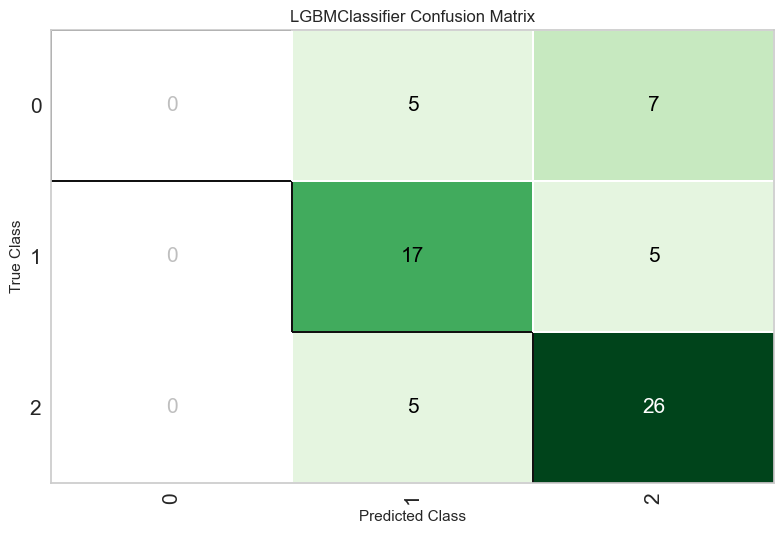

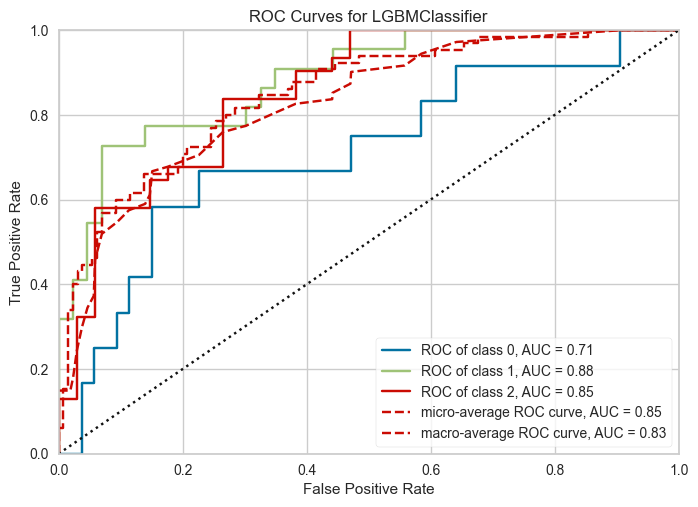

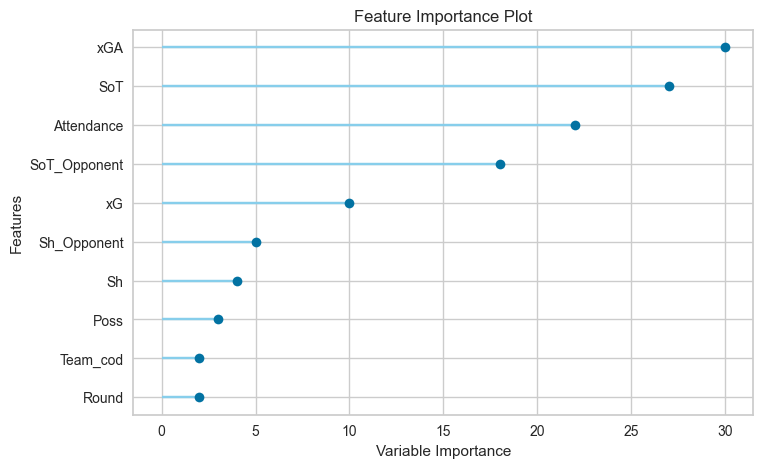

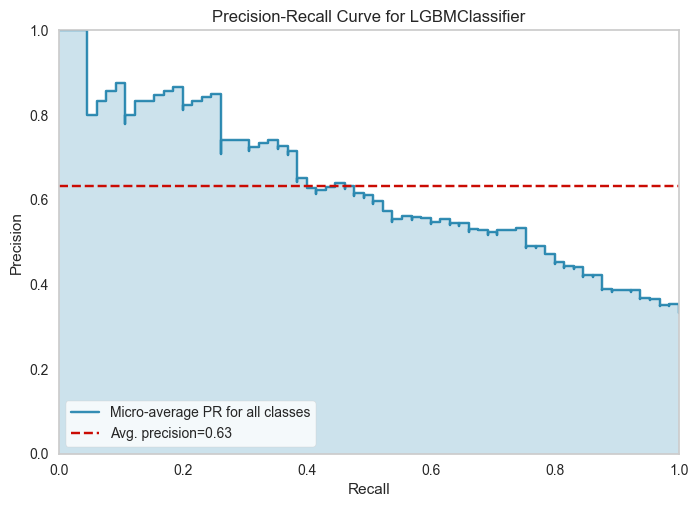

In [73]:
# Plotando gráficos gerados pelo PyCaret

plot_model(estimator=final_lightgbm, plot='confusion_matrix')
plot_model(estimator=final_lightgbm, plot='auc')
plot_model(estimator=final_lightgbm, plot='feature')
plot_model(estimator=final_lightgbm, plot='pr')


In [81]:
# Salvamento com save_model()

pred = predict_model(estimator=final_lightgbm, data=data_unseen)
save_model(final_lightgbm, 'Final_LightGBM_Model')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4583,0,0.4583,0.2943,0.3442,0.2200,0.2814


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Round', 'xG', 'xGA', 'Poss',
                                              'Attendance', 'Sh', 'SoT', 'Dist',
                                              'FK', 'PK', 'PKatt', 'Team_cod',
                                              'Opponent_cod', 'Poss_Opponent',
                                              'Sh_Opponent', 'SoT_Oppo...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_sample

In [82]:
# Previsões com predict_model()

saved_lightgbm = load_model('Final_LightGBM_Model')
pred = predict_model(estimator=saved_lightgbm, data=data_unseen)
pred.head()

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4583,0,0.4583,0.2943,0.3442,0.2200,0.2814


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


,Round,xG,xGA,Poss,Attendance,Sh,SoT,Dist,FK,PK,...,Poss_Opponent,Sh_Opponent,SoT_Opponent,Dist_Opponent,FK_Opponent,PK_Opponent,PKatt_Opponent,Result,prediction_label,prediction_score
0,13,1.3,0.6,59.0,53289.0,16.0,5.0,16.299999,1.0,0,...,41.0,8.0,3.0,15.9,0.0,0,0,D,W,0.7521
1,19,2.7,1.4,73.0,60261.0,30.0,8.0,16.799999,0.0,0,...,27.0,5.0,2.0,17.4,0.0,0,1,L,W,0.8274
2,2,2.9,0.6,60.0,41694.0,12.0,6.0,18.500000,0.0,1,...,40.0,9.0,2.0,14.7,0.0,0,0,W,W,0.8407
3,22,1.4,2.6,61.0,42191.0,12.0,5.0,14.300000,0.0,0,...,39.0,14.0,5.0,11.9,0.0,0,0,L,L,0.4611
4,15,4.1,1.5,45.0,73607.0,27.0,8.0,15.400000,1.0,0,...,55.0,13.0,3.0,15.0,0.0,0,0,W,W,0.6802


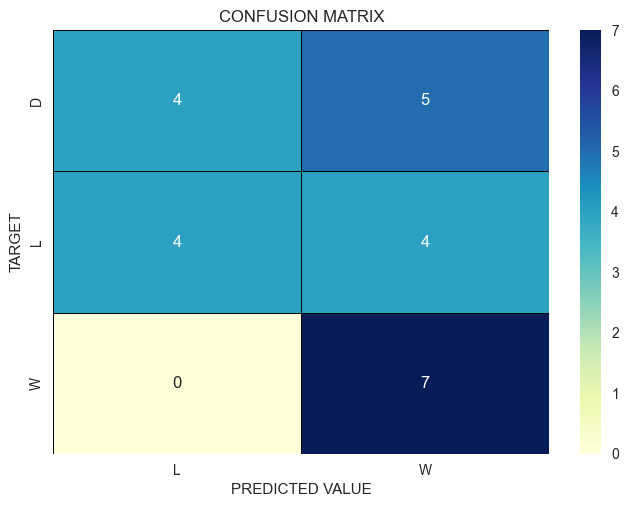

In [99]:
# Previsões com predict_model()

ct = pd.crosstab(pred['Result'], pred['prediction_label'])
ax = sns.heatmap(ct,
                         annot=True,
                         cmap="YlGnBu",
                         fmt='d',
                         linewidths=.5,
                         linecolor='black')
ax.set_title("CONFUSION MATRIX")
ax.set_xlabel('PREDICTED VALUE')
ax.set_ylabel('TARGET')
plt.show()

## **5. Conclusão:**

Com este projeto podemos retirar algumas análises.

- O DataSet é formado por apenas 476 linhas e 28 colunas. Porém metade são duplicadas, se tratando da mesma partida.
- Das 28 colunas, utilizamos 20 colunas mais a variável respota para a modelagem.
- Das 238 linhas que utilizamos, 90% (214 linhas) utilizamos para Treino (149 linhas) e Teste (65 linhas).
- 10% se trata da 'data_unseen' que nos serviu para validação.
- Apesar de ter predições boas em relação a vitórias e derrotas, o modelo não conseguiu prever empates.

Seria mais prudente buscar um dataset que apresente maior número de informações. Poderíamos considerar realizar uma nova busca por dados ou procurar o dataset completo, talvez buscando partidas de outras temporadas, aumentando o número de partidas, o nosso modelo poderá treinar mais e ter um melhor rendimento.